In [1]:
weather = pd.read_csv("../weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 1]

In [2]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
1030,1,2014-10-27,61.0,41.0,51.0,NaN,38.0,44.0,14.0,0.0,...,27,60.947558,48.266239,NaN,0,0,0,0,0,1
1031,1,2014-10-28,65.0,37.0,51.0,NaN,45.0,48.0,14.0,0.0,...,28,79.853021,50.316460,NaN,1,0,1,1,0,0
1032,1,2014-10-29,66.0,48.0,57.0,NaN,51.0,53.0,8.0,0.0,...,29,80.320545,56.738033,NaN,2,0,2,1,0,0
1033,1,2014-10-30,57.0,39.0,48.0,NaN,39.0,43.0,17.0,0.0,...,30,70.872191,46.795606,NaN,3,0,0,0,0,1
1034,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,0,0,1


In [3]:
train = pd.read_csv("../data/train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [4]:
key = pd.read_csv("../data/key.csv")
station = station.merge(key)

In [5]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,107,0
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,108,0
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,109,0
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,110,0
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,111,0


In [6]:
station['log1p_units'] = np.log1p(station.units)

In [7]:
# units가 다 0인 item_number 골라내기
stn_real = pd.DataFrame(columns = station.columns)
station["item_nbr"] = station["item_nbr"].astype("str")
item_number = station.groupby("item_nbr")["units"].agg(sum)
stn_item = item_number[item_number != 0].index
stn_real = pd.DataFrame(columns = station.columns)
for i in range(len(stn_item)):
    stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 다시 OLS

In [8]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,107
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,108
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,109
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,110
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,111


In [9]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

##### 1. OLS : df1 (units) 

In [10]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility + windchill + weekend \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:46:59   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4015 

##### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [11]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:47:19   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

##### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [12]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1173

In [13]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,29
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0


In [14]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1123.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:47:41   Log-Likelihood:            -1.2877e+05
No. Observations:              101508   AIC:                         2.579e+05
Df Residuals:                  101334   BIC:                         2.596e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

conditional number에 전혀 변화가 없다...

##### 4. 변수변환 : df2 (log1p_units) 

In [15]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2211.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:47:56   Log-Likelihood:                 31839.
No. Observations:              102675   AIC:                        -6.333e+04
Df Residuals:                  102501   BIC:                        -6.167e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야할 거 같다.

##### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [16]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2892

In [17]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0.000000
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0.000000
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0.000000
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0.000000
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0.000000
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0.000000
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0.000000
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0.000000
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,3.401197
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0.000000


In [18]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:48:38   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

설명력이 더 올라갔다.(0.870), conditional number는 그대로

##### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [19]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:48:59   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

변화없음.(5번 결과와 동일)

#### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

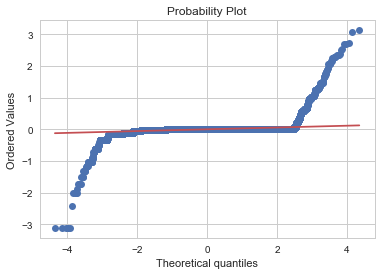

In [154]:
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

##### 8.  다중공선성 감소시키기 : VIF

In [162]:
df_vif = station[['station_nbr','tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill',
       'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY',
       'nothing', 'store_nbr', 'item_nbr']]

##### 9.  다중공선성 감소시키기 : PCA

In [166]:
from patsy import dmatrix
formula = "scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) \
        + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) \
        + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(item_nbr) \
        + C(store_nbr) + C(weekend) + C(rainY) + C(otherY) + C(nothing) + 0"

In [184]:
dfX = dmatrix(formula, station, return_type="dataframe")
dfy = pd.DataFrame(target1, columns=["units"])

In [185]:
idx = list(set(range(len(df2))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

##### ***tmax, tmin빠져서 conditional number 감소

In [187]:
model_units = sm.OLS(np.log1p(dfy), dfX)
result_units = model_units.fit()
print(result_units.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5177.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:12:26   Log-Likelihood:             1.0576e+05
No. Observations:              100227   AIC:                        -2.113e+05
Df Residuals:                  100100   BIC:                        -2.101e+05
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(item_nbr)[1]          

In [192]:
from sklearn.decomposition import PCA

In [222]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=25).fit_transform(dfX)))
model_units2 = sm.OLS(np.log1p(dfy), dfX2)
result_units2 = model_units2.fit()
print(result_units2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9492
Date:                Tue, 03 Jul 2018   Prob (F-statistic):              0.535
Time:                        22:32:55   Log-Likelihood:                 4693.6
No. Observations:              100227   AIC:                            -9335.
Df Residuals:                  100201   BIC:                            -9088.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.001     29.595      0.0

R square가 0.00....

##### 9.  다중공선성 감소시키기 : 정규화

In [251]:
# 6번 model 사용
# 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)
result2 = model2_1_1.fit_regularized(alpha=0.001, L1_wt=0)

In [252]:
result2.params[result2.params>0]

array([  3.58580529e-02,   3.99312686e-03,   1.57665750e-03,
         2.11581000e-04,   3.58340176e-05,   4.76181011e-04,
         1.89128572e-03,   9.86646007e-04,   7.60515755e-04,
         5.47372719e-04,   1.60316771e-03,   5.26146706e-04,
         1.60817896e-03,   3.43405592e-03,   2.19358654e-03,
         2.68244675e-04,   2.21284910e-03,   9.75160150e-04,
         4.82601106e-03,   3.15856468e-03,   2.47061093e-03,
         1.18650669e-03,   1.71886890e-04,   5.04179686e-04,
         1.67009949e-03,   6.95788229e-05,   2.45767337e-03,
         6.47912182e-03,   6.29617307e-03,   4.51900328e-03,
         1.89608259e-03,   2.36286988e+00,   1.38127288e+00,
         2.06362800e-02,   2.82759464e-01,   6.68210348e-02,
         9.56244084e-03,   8.60860426e-02,   3.21597242e-04,
         2.73822032e-04,   3.04356962e-04,   3.79611132e-03,
         5.91182647e-03,   2.69448899e-04,   9.29692978e-04,
         1.39670268e-03,   2.23730090e-03])

In [112]:
# units가 다 0인 item_number 골라내기
stn_real = pd.DataFrame(columns = station.columns)
station["item_nbr"] = station["item_nbr"].astype("str")
item_number = station.groupby("item_nbr")["units"].agg(sum)
stn_item = item_number[item_number != 0].index
stn_real = pd.DataFrame(columns = station.columns)
for i in range(len(stn_item)):
    stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

In [113]:
# station = station[station["units"] > 0].reset_index(drop=True)

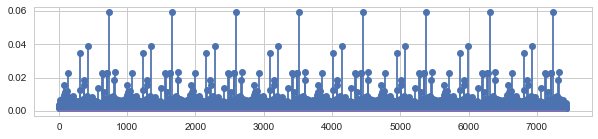

In [150]:
# set(range(len(station)))
# len(stn_real)
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [154]:
idx = list(set(range(len(station))).difference(idx_outlier))
df = station.iloc[idx, :].reset_index(drop=True)
df

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units,log1p_units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,2,0,0.000000
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,4,0,0.000000
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,8,0,0.000000
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,13,0,0.000000
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,16,0,0.000000
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,20,0,0.000000
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,22,0,0.000000
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,24,0,0.000000
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,26,0,0.000000
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,6,1,2,1,1,0,1,28,2,1.098612


In [163]:
model = sm.OLS.from_formula('log1p_units ~ scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool) \
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed) \
                            + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(item_nbr) \
                            + C(store_nbr) + C(weekend) + C(rainY) + C(otherY) + C(nothing) - 1', data=df)
result = model.fit()

In [164]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     2929.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:54:39   Log-Likelihood:                 30565.
No. Observations:              100025   AIC:                        -6.088e+04
Df Residuals:                   99898   BIC:                        -5.967e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(item_nbr)[1]  

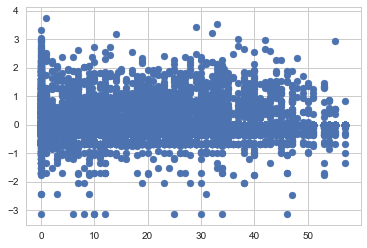

In [169]:
# 이분산성 확인
plt.scatter(df['heat'], result.resid)
plt.show()

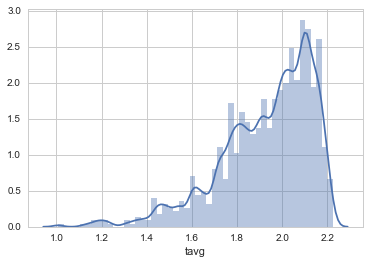

In [185]:
sns.distplot((np.log(np.sqrt(station['tavg']))))
plt.show()

In [188]:
df.corr()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units,log1p_units
station_nbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tmax,NaN,1.000000,0.931384,0.984783,NaN,0.908036,0.961609,-0.963493,0.620020,NaN,...,-0.007873,0.004021,0.043937,-0.013248,-0.042259,0.021385,NaN,-0.000189,-0.008258,-0.008561
tmin,NaN,0.931384,1.000000,0.980477,NaN,0.956370,0.979879,-0.954302,0.629502,NaN,...,0.003149,-0.001691,0.159398,0.098710,-0.015701,-0.088079,NaN,-0.000525,-0.006422,-0.007448
tavg,NaN,0.984783,0.980477,1.000000,NaN,0.947037,0.987198,-0.976005,0.635422,NaN,...,-0.002749,0.001364,0.099828,0.039967,-0.030322,-0.030497,NaN,-0.000353,-0.007526,-0.008180
depart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dewpoint,NaN,0.908036,0.956370,0.947037,NaN,1.000000,0.981968,-0.931477,0.576845,NaN,...,-0.003264,-0.005228,0.258650,0.209900,0.038022,-0.199123,NaN,-0.000817,-0.006167,-0.005815
wetbulb,NaN,0.961609,0.979879,0.987198,NaN,0.981968,1.000000,-0.967235,0.615245,NaN,...,-0.003123,0.000705,0.170784,0.111944,-0.003961,-0.101747,NaN,-0.000597,-0.006798,-0.007088
heat,NaN,-0.963493,-0.954302,-0.976005,NaN,-0.931477,-0.967235,1.000000,-0.471317,NaN,...,-0.002359,-0.007650,-0.119064,-0.051240,0.055289,0.041129,NaN,0.000365,0.008035,0.008578
cool,NaN,0.620020,0.629502,0.635422,NaN,0.576845,0.615245,-0.471317,1.000000,NaN,...,-0.028335,-0.023522,0.006356,-0.001900,0.067279,0.004731,NaN,-0.000085,-0.003453,-0.003744
sunrise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

In [196]:
df.loc[:,1:]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [73]:
df1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill',
       'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY',
       'nothing', 'store_nbr', 'item_nbr', 'units'],
      dtype='object')

In [123]:
df1_1.describe()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
count,101946.0,101946.000000,101946.000000,101946.000000,0.0,101946.000000,101946.000000,101946.000000,101946.000000,0.0,...,0.0,101946.000000,101946.000000,101946.000000,101946.000000,101946.000000,101946.000000,101946.0,101946.000000,101946.000000
mean,1.0,60.623728,41.647571,51.135650,NaN,37.948739,45.286957,15.661718,1.941817,NaN,...,NaN,3.000108,0.285445,0.828851,0.500510,0.079513,0.493104,1.0,56.375846,0.114315
std,0.0,18.962220,16.775911,17.564769,NaN,19.021431,16.114158,15.015078,4.658890,NaN,...,NaN,2.000380,0.451628,0.886439,0.500002,0.270539,0.499955,0.0,31.927054,1.467545
min,1.0,14.000000,-4.000000,7.500000,NaN,-12.000000,4.000000,0.000000,-34.350000,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
25%,1.0,45.000000,29.000000,37.500000,NaN,23.000000,33.000000,0.000000,0.000000,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,29.000000,0.000000
50%,1.0,62.000000,42.000000,52.500000,NaN,39.000000,46.000000,12.000000,0.000000,NaN,...,NaN,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,57.000000,0.000000
75%,1.0,77.000000,56.000000,66.000000,NaN,54.000000,59.000000,27.000000,1.000000,NaN,...,NaN,5.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.0,84.000000,0.000000
max,1.0,97.000000,77.000000,85.500000,NaN,71.000000,76.000000,57.000000,21.000000,NaN,...,NaN,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,111.000000,91.000000
